c:\Users\FeyiA\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


File found and loaded into DataFrame:
Training Size: 8000
Test Size: 2000




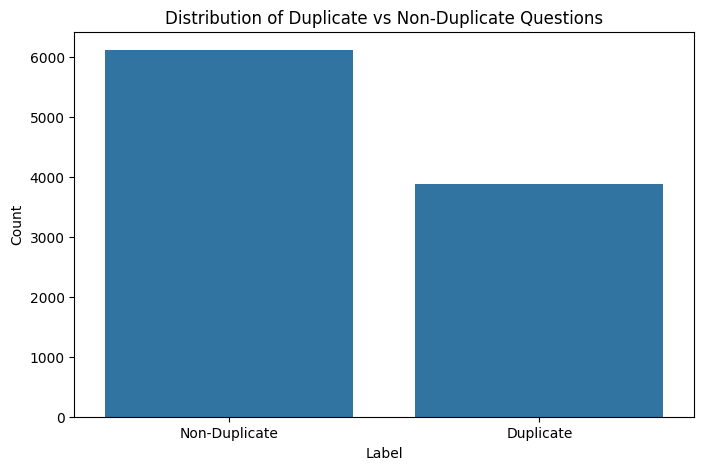

,is_duplicate,question1,question2,question1_tokens,question2_tokens,evolve_features,similarity
0,0,What is the lowest post an IAS would get after...,How does it feel after an IAS gets promoted fr...,"[lowest, post, ia, would, get, qualifying, ia]","[feel, ia, get, promoted, dm, secretary]","[0.8571428571428571, 0.42857142857142855, 0.40...",0.395011
1,1,What is the worst start up business idea that ...,What is the worst possible business idea you h...,"[worst, start, business, idea, ever, heard]","[worst, possible, business, idea, heard, seen]","[1.0, 0.6666666666666666, 0.5773502691896258, ...",0.864275
2,0,Is Politico biased? Republican or Democrat?,Is Jake Tapper a republican or democrat?,"[politico, biased, republican, democrat]","[jake, tapper, republican, democrat]","[1.0, 0.75, 0.5, 0.4090909090909091, 0.3333333...",0.371252
3,1,What is the salary after becoming income tax o...,What is the salary of fresher income tax officer?,"[salary, becoming, income, tax, officer]","[salary, fresher, income, tax, officer]","[1.0, 0.8, 0.82502864732539, 0.55, 0.666666666...",0.889240
4,0,What is MRI scanning?,What happens when you get an MRI scan?,"[mri, scanning]","[happens, get, mri, scan]","[0.5, 0.0, 0.7071067811865475, 0.2727272727272...",0.787193
...,...,...,...,...,...,...,...
9995,1,What are Hillary Clinton's plans for India?,What is Hillary Clinton's foreign policy outlo...,"[hillary, clinton, plan, india]","[hillary, clinton, foreign, policy, outlook, r...","[0.5714285714285714, 0.42857142857142855, 0.81...",0.832848
9996,1,What is it like to be retained (held back) a g...,Have you ever been dropped back a grade in sch...,"[like, retained, held, back, grade, school]","[ever, dropped, back, grade, school]","[0.8333333333333334, 0.5, 0.4629100498862757, ...",0.688439
9997,1,What is the proper diet to gain weight?,What is the best diet to gain weight?,"[proper, diet, gain, weight]","[best, diet, gain, weight]","[1.0, 0.75, 1.0000000000000002, 0.6, 0.6, 0.86...",0.935621
9998,0,What is Pradhan Mantri Fasal Bima Yojna (PMFBY...,How is Gold Monetisation Scheme different from...,"[pradhan, mantri, fasal, bima, yojna, pmfby, d...","[gold, monetisation, scheme, different, previo...","[0.8461538461538461, 0.6923076923076923, 0.836...",0.441308


In [1]:
# Data Processing
import numpy as np
import os
import time

# Import Helper Modules
from Evaluation_Modules.Threshold_Eval import best_possible_threshold
from Evaluation_Modules.GP_Eval import save_gp, load_gp
from Preprocessing_Modules.Features import feature_names
from Preprocessing_Modules.Preprocess import create_dataset, extract_test_train
from GP_Modules.Fitness_Function import evolved_threshold
from Visualization_Modules.Viz import plot_class_distribution
from GP_Modules.NSGA2 import configure_NSGA2_GP, NSGA2
from matplotlib import pyplot as plt
import pandas as pd
import time


# Create Dataset and Extract Features
num_rows = 10000
subset_percent = 1
df = create_dataset(subset_percent = 1, num_rows = num_rows)

# Split Dataset into Train and Test Set
X, Y, test_indices, [X_train, X_test, Y_train, Y_test, SIMILARITY_train, SIMILARITY_test] = extract_test_train(df, test_size=0.2)
plot_class_distribution(df)
df

In [2]:
best_static, static_acc = best_possible_threshold(SIMILARITY_test, Y_test, increment=0.01)
print(f"Best Possible Static Threshold on Test Set: {best_static} | Test Accuracy: {static_acc}")

Best Possible Static Threshold on Test Set: 0.8 | Test Accuracy: 0.7655


In [3]:

toolbox_NSGA2, pset = configure_NSGA2_GP(feature_names, X_train, Y_train, SIMILARITY_train)


parameters = {
    "GP": {
        "population": 100,
        "generations": 100,
        "prob_xover": 0.8,
        "prob_mutate": 0.2,
    },
    "Dataset": {
        "num_rows": num_rows,
        "subset_percent": subset_percent
    }
}


In [4]:
saved_run = "solutions/run_2025-01-19_17-14-23"
# saved_run = ""
if not os.path.exists(saved_run):
    pop, log, hof, stats = NSGA2(toolbox_NSGA2, population_size=parameters["GP"]["population"], num_generations=parameters["GP"]["generations"], prob_xover = parameters["GP"]["prob_xover"], prob_mutate = parameters["GP"]["prob_mutate"])
    saved_run = save_gp(parameters, pop, log, hof, stats, "solutions") # Saving Solution
else:
    parameters, pop, log, hof, stats = load_gp(saved_run)

Loaded GP results successfully.


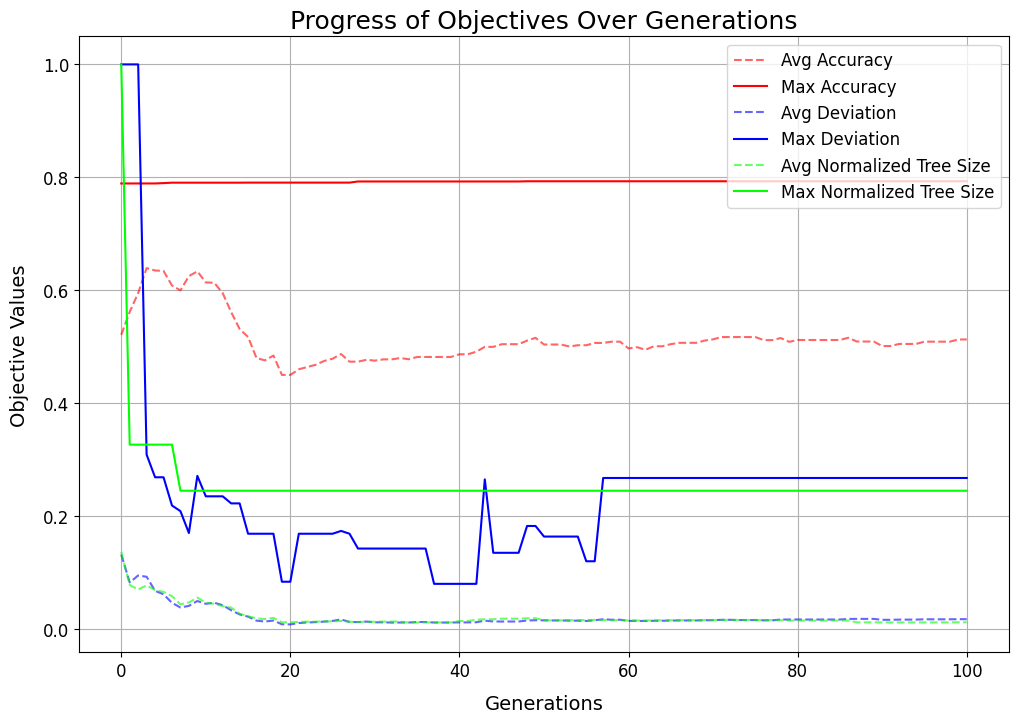

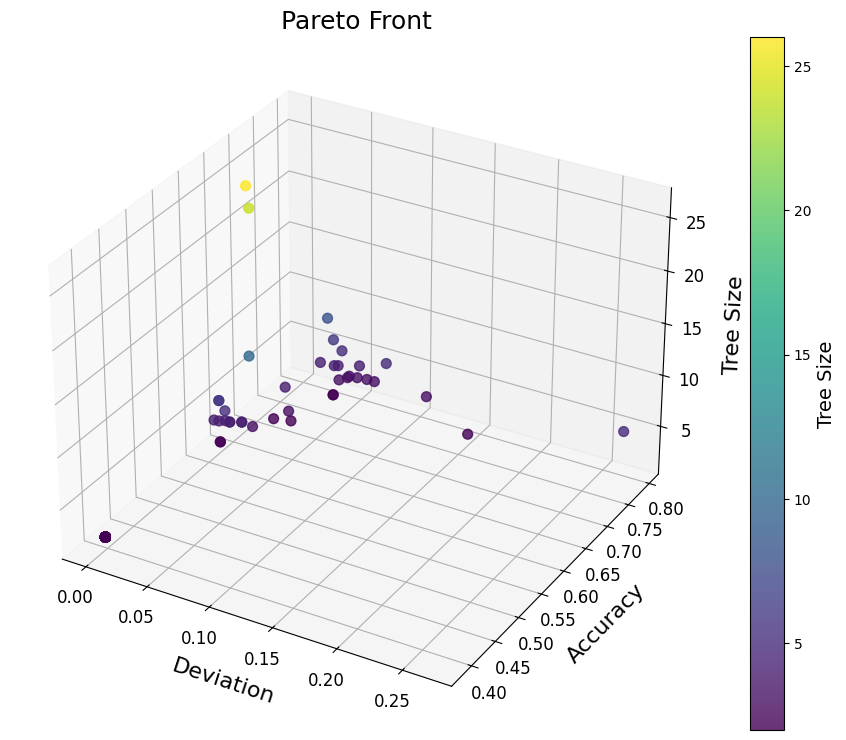

Best Solution
--------------------------------------------------
Length: 5 | Expression: sigmoid(s_round(safe_exp(safe_tanh(char_ngram))))
Test Accuracy: 0.7815
Precision: 0.7125 | Recall: 0.7336 | F1-Score: 0.7229
Max Threshold: 0.8900 | Min Threshold: 0.7300
Mean Threshold: 0.8112 | Std Threshold: 0.0460
--------------------------------------------------


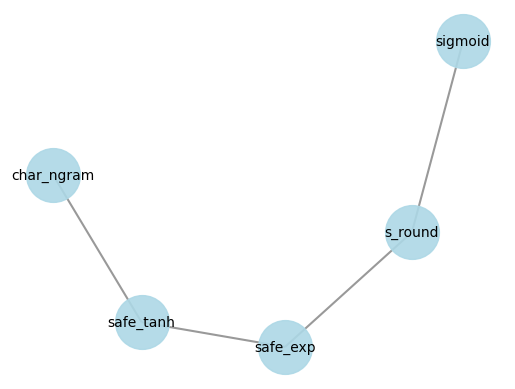

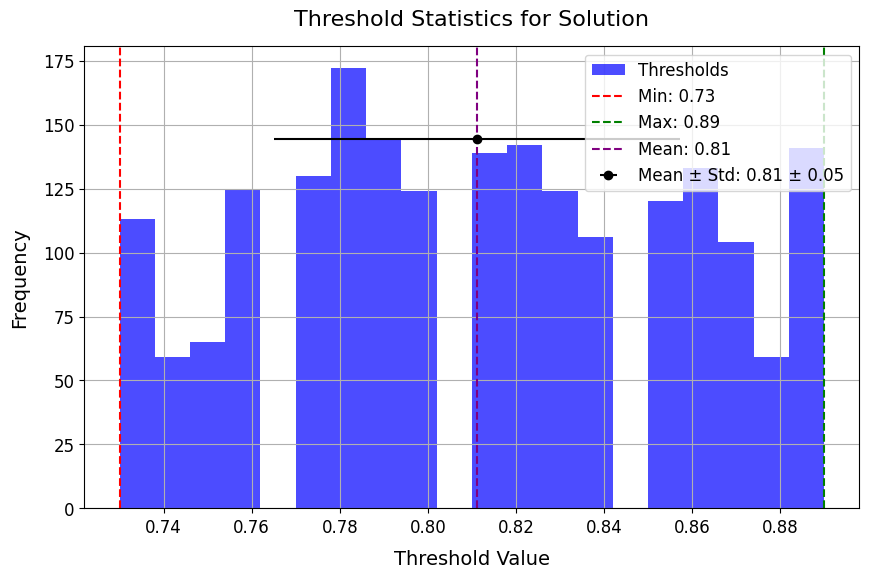

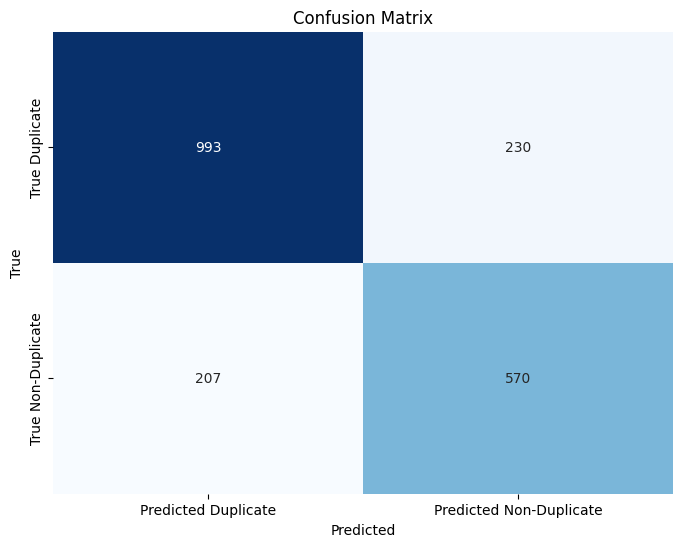

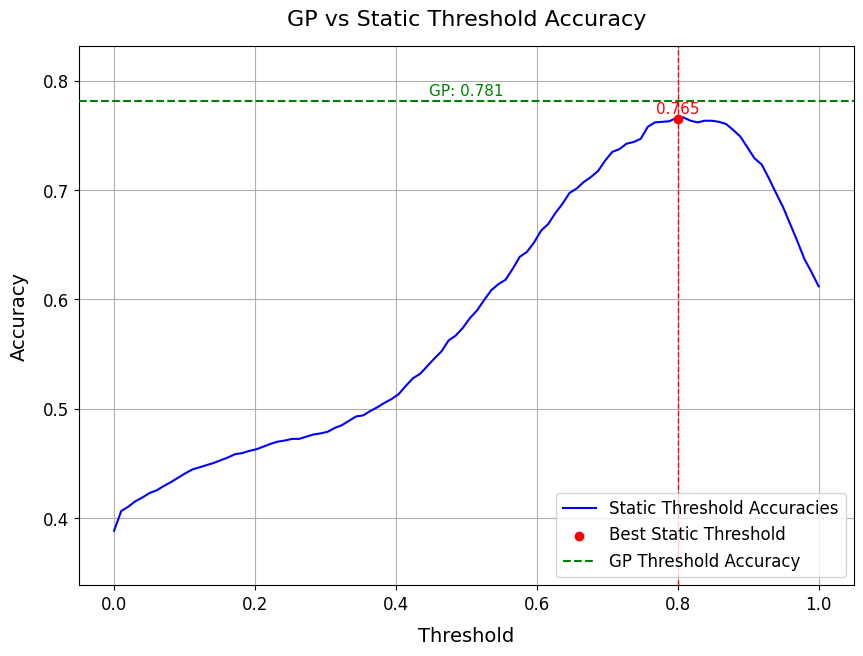

In [5]:
# Visualization
from Visualization_Modules.Viz import visualize_solution, visualize_confusion_matrix, visualize_threshold_statistics, plot_3D_objectives, clf_comparison_gp_vs_static, plot_objective_progress
from Evaluation_Modules.GP_Eval import evaluate_solution, print_evaluation_results

plot_objective_progress(log, ["Accuracy", "Deviation", "Normalized Tree Size"], generations=None)
plot_3D_objectives(pop)
print("Best Solution")
print_evaluation_results(evaluate_solution(hof[0], X_test, Y_test, SIMILARITY_test, pset))
visualize_solution(hof[0])
visualize_threshold_statistics(hof[0], X_test, pset)
visualize_confusion_matrix(hof[0], X_test, Y_test, SIMILARITY_test, pset)
clf_comparison_gp_vs_static(hof[0], X_test, Y_test, SIMILARITY_test, pset)

In [6]:
# Evaluate missclassified examples
best_func = toolbox_NSGA2.compile(expr=hof[0])
test_threshold_predictions = np.array([evolved_threshold(best_func(*x)) for x in X_test])
predicted_labels = np.array([1 if sim >= threshold else 0 for sim, threshold in zip(SIMILARITY_test, test_threshold_predictions)])
indexes = np.where((Y_test == 1) & (predicted_labels == 0))[0]
similarity_values = SIMILARITY_test[indexes]
thresholds = test_threshold_predictions[indexes]
misclassified_indexes = np.where(Y_test != predicted_labels)[0]

print("Misclassified Samples")
# Look at details of misclassified samples
for idx in misclassified_indexes:  # Limit to first 15 for inspection
    print(f"Index: {idx}")
    print(f"Question1: {df.iloc[test_indices[idx]]['question1']}")
    print(f"Question2: {df.iloc[test_indices[idx]]['question2']}")
    print(f"True Label: {Y_test[idx]}, Predicted Label: {predicted_labels[idx]}")
    print(f"Similarity: {SIMILARITY_test[idx]}, Threshold: {test_threshold_predictions[idx]}")
    print("-" * 50)


Misclassified Samples
Index: 4
Question1: What happens when we drop silica gel in water?
Question2: What will happen if we dissolve silica gel in water and mistakenly consume that water?
True Label: 0, Predicted Label: 1
Similarity: 0.8860993385314941, Threshold: 0.8
--------------------------------------------------
Index: 10
Question1: Are pornstars on Quora?
Question2: How many real life pornstars are there on Quora?
True Label: 0, Predicted Label: 1
Similarity: 0.8272925019264221, Threshold: 0.82
--------------------------------------------------
Index: 15
Question1: Why is the band Tool so popular?
Question2: What is your review of Tool (band)?
True Label: 1, Predicted Label: 0
Similarity: 0.7272375822067261, Threshold: 0.78
--------------------------------------------------
Index: 20
Question1: How can I increase my weight and become fit?
Question2: What are some ways to increase weight?
True Label: 0, Predicted Label: 1
Similarity: 0.8475545048713684, Threshold: 0.82
-----------

Loading existing results from evaluation_metrics_with_time.csv...

=== Performance Metrics Across Test Sizes ===
   accuracy  precision    recall        f1  length  \
0  0.774500   0.686927  0.770914  0.726501       9   
1  0.779750   0.692837  0.777992  0.732949      18   
2  0.790333   0.683687  0.856223  0.760290       5   
3  0.790250   0.693474  0.824268  0.753235       7   
4  0.793333   0.722888  0.758867  0.740441       8   

                                          expression  max_threshold  \
0  s_sqrt(sigmoid(if_else(seq_align, if_else(pos_...           0.86   
1  s_sqrt(if_else(s_average(s_div(s_div(0.1, syn_...           0.86   
2    sigmoid(safe_exp(s_square(s_square(fuzz_sim))))           0.94   
3  sigmoid(s_pow(s_pow(safe_exp(fuzz_sim), fuzz_s...           0.94   
4  sigmoid(if_else(pos_cos, s_pow(safe_exp(fuzz_s...           0.94   

   min_threshold  mean_threshold  std_threshold  test_size  training_time  
0           0.72        0.800590       0.036109        0.2 

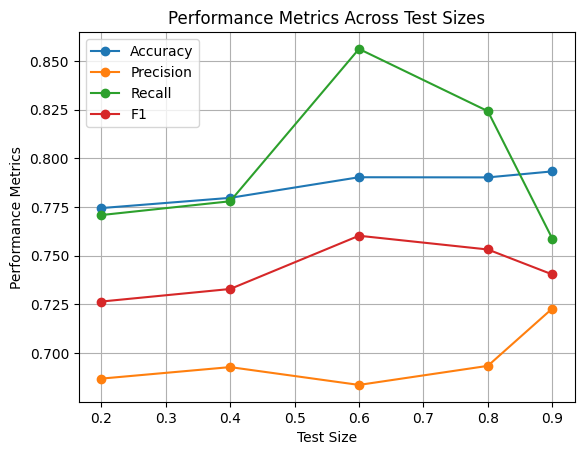

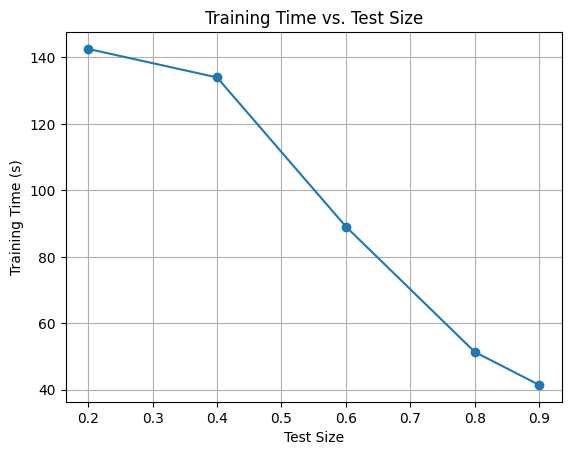

In [7]:
import os
import pandas as pd
import time
import matplotlib.pyplot as plt

# Define test sizes for evaluation
test_sizes = [0.2, 0.4, 0.6, 0.8, 0.9]

# File to save or load results
csv_file = "evaluation_metrics_with_time.csv"

# Check if the CSV file exists
if os.path.exists(csv_file):
    print(f"Loading existing results from {csv_file}...")
    results_df = pd.read_csv(csv_file)
else:
    print("CSV file not found. Running evaluations...")
    # Initialize a list to store evaluation results
    results = []

    # Loop over different test sizes
    for test_size in test_sizes:
        print(f"\nEvaluating with test size: {test_size:.2f}")
        
        # Start timing
        start_time = time.time()
        
        # Split the dataset
        _, _, _, [X_train, X_test, Y_train, Y_test, SIMILARITY_train, SIMILARITY_test] = extract_test_train(df, test_size=test_size)
        
        # Configure NSGA-II
        toolbox_NSGA2, pset = configure_NSGA2_GP(feature_names, X_train, Y_train, SIMILARITY_train)
        
        # Run NSGA-II
        pop, log, hof, stats = NSGA2(
            toolbox_NSGA2,
            population_size=parameters["GP"]["population"],
            num_generations=parameters["GP"]["generations"],
            prob_xover=parameters["GP"]["prob_xover"],
            prob_mutate=parameters["GP"]["prob_mutate"]
        )
        
        # Stop timing
        elapsed_time = time.time() - start_time
        
        # Evaluate the best solution (hof[0])
        evaluation = evaluate_solution(hof[0], X_test, Y_test, SIMILARITY_test, pset)
        evaluation["test_size"] = test_size  # Add test size to results
        evaluation["training_time"] = elapsed_time  # Add training time to results
        
        # Print results for this test size
        print(f"Accuracy: {evaluation['accuracy']:.4f}, Precision: {evaluation['precision']:.4f}, "
              f"Recall: {evaluation['recall']:.4f}, F1: {evaluation['f1']:.4f}, Training Time: {elapsed_time:.2f}s")
        
        # Store the results
        results.append(evaluation)

    # Organize results into a DataFrame for analysis
    results_df = pd.DataFrame(results)

    # Save the results to a CSV file
    results_df.to_csv(csv_file, index=False)
    print(f"Results saved to {csv_file}.")

# Display the results
print("\n=== Performance Metrics Across Test Sizes ===")
print(results_df)

# Visualize performance metrics (Optional)
metrics = ["accuracy", "precision", "recall", "f1"]
for metric in metrics:
    plt.plot(results_df["test_size"], results_df[metric], marker='o', label=metric.capitalize())
plt.xlabel("Test Size")
plt.ylabel("Performance Metrics")
plt.title("Performance Metrics Across Test Sizes")
plt.legend()
plt.grid()
plt.show()

# Visualize training time
plt.plot(results_df["test_size"], results_df["training_time"], marker='o', label="Training Time")
plt.title("Training Time vs. Test Size")
plt.xlabel("Test Size")
plt.ylabel("Training Time (s)")
plt.grid()
plt.show()
